# Little helpers to ease EDA
EDA, albeit very time consuming, is a very important part of every DS task.
Lately I've been using these great tools that ease EDA.
Check them out.

- [missingno](https://github.com/ResidentMario/missingno)
- [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling)
- [great_expectations](https://github.com/great-expectations/great_expectations)

## Init

In [1]:
import numpy as np
import json

%matplotlib inline

# missingno
> Messy datasets? Missing values? missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset.
> Just pip install missingno to get started.
> -- https://github.com/ResidentMario/missingno

In [2]:
from quilt.data.ResidentMario import missingno_data


collisions = missingno_data.nyc_collision_factors()
collisions = collisions.replace("nan", np.nan)

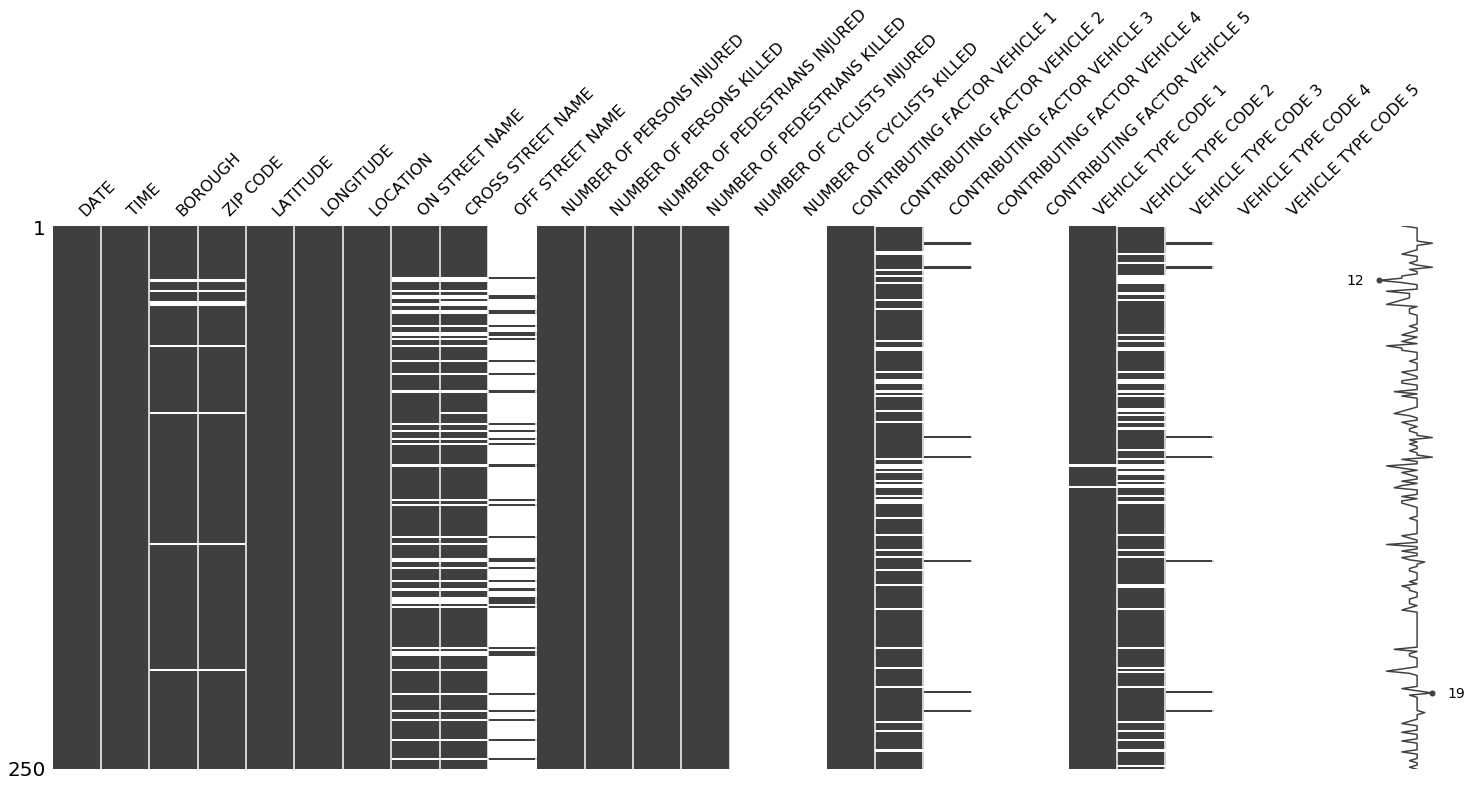

In [3]:
import missingno as msno


msno.matrix(collisions.sample(250))

# pandas_profiling
> Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis.
> --https://github.com/pandas-profiling/pandas-profiling

In [5]:
import pandas as pd
from pandas_profiling import ProfileReport

In [6]:
df = pd.read_csv("data_v1.csv")

In [7]:
report = ProfileReport(df)

In [8]:
report.to_file("report_v1.html")

# great_expectations
> Great Expectations is a framework that helps teams save time and promote analytic integrity with a new twist on automated testing: pipeline tests. Pipeline tests are applied to data (instead of code) and at batch time (instead of compile or deploy time).
> -- https://github.com/great-expectations/great_expectations

In [9]:
import great_expectations as ge

In [10]:
df = ge.from_pandas(df)

type(df)

great_expectations.dataset.pandas_dataset.PandasDataset

In [11]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
df.expect_column_values_to_be_in_set(
    "Name",
    set(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']),
)

{'success': True,
 'result': {'element_count': 150,
  'missing_count': 0,
  'missing_percent': 0.0,
  'unexpected_count': 0,
  'unexpected_percent': 0.0,
  'unexpected_percent_nonmissing': 0.0,
  'partial_unexpected_list': []}}

In [14]:
df.expect_column_min_to_be_between(
    "PetalWidth",
    min_value=0.1,
)

{'success': True,
 'result': {'observed_value': 0.1,
  'element_count': 150,
  'missing_count': 0,
  'missing_percent': 0.0}}

In [15]:
# there are many, many expectations!
# and you can write your own!

In [16]:
df.validate()

{'results': [{'success': True,
   'exception_info': {'raised_exception': False,
    'exception_message': None,
    'exception_traceback': None},
   'expectation_config': {'expectation_type': 'expect_column_to_exist',
    'kwargs': {'column': 'SepalLength', 'result_format': 'BASIC'}}},
  {'success': True,
   'exception_info': {'raised_exception': False,
    'exception_message': None,
    'exception_traceback': None},
   'expectation_config': {'expectation_type': 'expect_column_to_exist',
    'kwargs': {'column': 'SepalWidth', 'result_format': 'BASIC'}}},
  {'success': True,
   'exception_info': {'raised_exception': False,
    'exception_message': None,
    'exception_traceback': None},
   'expectation_config': {'expectation_type': 'expect_column_to_exist',
    'kwargs': {'column': 'PetalLength', 'result_format': 'BASIC'}}},
  {'success': True,
   'exception_info': {'raised_exception': False,
    'exception_message': None,
    'exception_traceback': None},
   'expectation_config': {'expe

In [17]:
df.save_expectations_config("expectations.json")

	0 failing expectations
	7 result_format kwargs
	0 include_configs kwargs
	0 catch_exceptions kwargs
If you wish to change this behavior, please set discard_failed_expectations, discard_result_format_kwargs, discard_include_configs_kwargs, and discard_catch_exceptions_kwargs appropirately.


## Load and validate new data

In [18]:
with open("expectations.json") as f:
    expectations = json.load(f)

df_v2 = ge.read_csv(
    "data_v1.csv",
    expectations_config=expectations,
)
df_v2.validate(only_return_failures=True)

{'results': []}

In [19]:
ge.validate(
    pd.read_csv("data_v1.csv"),
    expectations_config=expectations,
    only_return_failures=True,
)

{'results': []}

## Load and validate "unexpected data"

In [20]:
df = pd.read_csv("data_v1.csv")
df.loc[0, "PetalWidth"] = 0

In [21]:
ge.validate(
    df,
    expectations_config=expectations,
    only_return_failures=True,
)

{'results': [{'success': False,
   'result': {'observed_value': 0.0,
    'element_count': 150,
    'missing_count': 0,
    'missing_percent': 0.0},
   'exception_info': {'raised_exception': False,
    'exception_message': None,
    'exception_traceback': None},
   'expectation_config': {'expectation_type': 'expect_column_min_to_be_between',
    'kwargs': {'column': 'PetalWidth', 'min_value': 0.1}}}]}